# Business Understanding
* We want to understand which reviewers and listers contribute to airbnb the most
* Additionally if cancellation policy affects price of the apartment
* We in future also be able to provide our listers a price recommendation when the create a new listing, so
predicting price is important
<br>

* Question 1 : Average Price for each cancellation policy
* Question 2 : Top 10 listings with atleast 9.0 review
* Question 3 : Top 10 reviewers based on count of reviews
* Question 4 : Can we predict price of apartments accurately ?

# Import Libraries

In [1]:
#import all required libraries and more
import pandas as pd
import numpy as np
from datetime import date
import re
import os

#import matplotlib for plotting graphs
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
#import libraries for machine learning
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.metrics import mean_squared_error

# Import Data

In [3]:
#read the files into dataframes
df_calendar = pd.read_csv('archive/calendar.csv')
df_listings = pd.read_csv('archive/listings.csv')
df_reviews = pd.read_csv('archive/reviews.csv')

# Data Understanding

In [4]:
df_calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [5]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [7]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [8]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [9]:
df_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [10]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


# Prepare Data
* Data Cleaning

## 1. df_calendar

In [11]:
df_calendar.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [12]:
#look at metadata for df_calendar
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [13]:
#check for null values
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [14]:
#change listing id to string
df_calendar['listing_id'] = df_calendar['listing_id'].astype(str)

In [15]:
# define function for removing extra character in a column
def remove_character(price):
    '''Removes $ character
    in the String'''
    if type(price) is str:
        return re.sub("[\$,]",'',price)
    return price

In [16]:
# removing character $ for price in df_calendar
df_calendar['price'].fillna(0, inplace=True)


df_calendar['price'] = df_calendar.price.apply(remove_character)
df_calendar['price'] = df_calendar['price'].astype(float)

## 2. df_listings

In [17]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [18]:
# removing character $ for price in df_calendar
df_listings['price'].fillna(0, inplace=True)


df_listings['price'] = df_listings.price.apply(remove_character)
df_listings['price'] = df_listings['price'].astype(float)

df_listings = df_listings.rename(columns={'id': 'listing_id'})
df_listings['listing_id'] = df_listings['listing_id'].astype(str)

In [19]:
df_listings_filtered = df_listings[['listing_id','host_id','host_since','host_response_time','host_response_rate','host_is_superhost','host_listings_count','host_identity_verified','zipcode','property_type','accommodates','bathrooms','bedrooms','beds','price','weekly_price','monthly_price','extra_people','minimum_nights','number_of_reviews','review_scores_rating','instant_bookable']]

In [20]:
df_listings_filtered.head(2)

,listing_id,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,zipcode,property_type,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,extra_people,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
0,241032,956883,2011-08-11,within a few hours,96%,f,3.0,t,98119,Apartment,4,1.0,1.0,1.0,85.0,NaN,NaN,$5.00,1,207,95.0,f
1,953595,5177328,2013-02-21,within an hour,98%,t,6.0,t,98119,Apartment,4,1.0,1.0,1.0,150.0,"$1,000.00","$3,000.00",$0.00,2,43,96.0,f


In [21]:
df_listings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              3818 non-null   object 
 1   host_id                 3818 non-null   int64  
 2   host_since              3816 non-null   object 
 3   host_response_time      3295 non-null   object 
 4   host_response_rate      3295 non-null   object 
 5   host_is_superhost       3816 non-null   object 
 6   host_listings_count     3816 non-null   float64
 7   host_identity_verified  3816 non-null   object 
 8   zipcode                 3811 non-null   object 
 9   property_type           3817 non-null   object 
 10  accommodates            3818 non-null   int64  
 11  bathrooms               3802 non-null   float64
 12  bedrooms                3812 non-null   float64
 13  beds                    3817 non-null   float64
 14  price                   3818 non-null   

## 3. df_reviews

In [22]:
df_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [23]:
df_reviews['listing_id'] = df_reviews['listing_id'].astype(str)

# Analysis

In [24]:
#df_listings = df_listings.rename(columns={'id': 'listing_id'})
#df_listings['listing_id'] = df_listings['listing_id'].astype(str)

## Question 1 - Does cancellation policy affect price of apartment ?

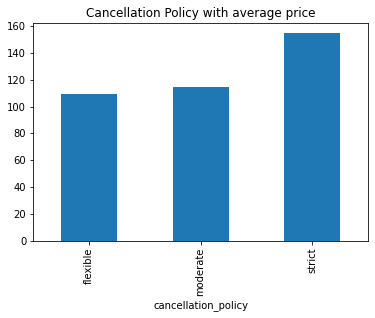

In [25]:
#Grouping Cancelation Policy with mean price
count_vals = df_listings.groupby('cancellation_policy').mean('price')['price']

(count_vals[:10]).plot(kind="bar");
plt.title("Cancellation Policy with average price");

* We see that airbnbs in Seattle with strict cancellation policy cost more

## Question 2 - Top 10 listings with most reviews, atleast a 9.0 review score

In [26]:
#This question gives information about most popular listings

In [27]:
#Joining listings dataframe to reviews dataframe using left join
df_listings_with_reviewer = pd.merge(df_listings[df_listings['review_scores_value'] > 9], 
                                     df_reviews.groupby('listing_id').size().to_frame('size') , 
                                     on='listing_id', how='left')

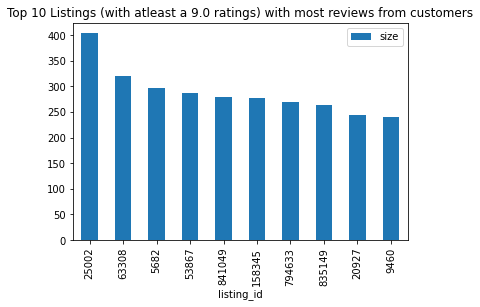

In [28]:
count_vals = df_listings_with_reviewer[["listing_id", "size"]].sort_values('size', ascending=False).head(10).groupby('listing_id').sum('size').sort_values('size', ascending=False)

(count_vals[:10]).plot(kind="bar");
plt.title("Top 10 Listings (with atleast a 9.0 ratings) with most reviews from customers");

* Since these top 10 listings give us most revenue in Seattle we should offer them some incentives

## Question 3 - Top 10 reviewers

In [29]:
#Which reviewers contribute the most to Airbnb Seattle

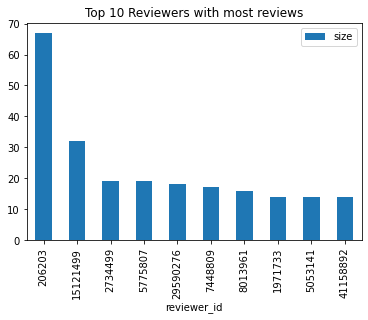

In [30]:
count_vals = df_reviews.groupby('reviewer_id').size().to_frame('size').sort_values('size', ascending=False).head(10)

(count_vals[:10]).plot(kind="bar");
plt.title("Top 10 Reviewers with most reviews");

* These top 10 reviewers should be rewarded to movivate users to write reviews

## Question 4 : How accurately can we predict price from data ?

In [31]:
df_listings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              3818 non-null   object 
 1   host_id                 3818 non-null   int64  
 2   host_since              3816 non-null   object 
 3   host_response_time      3295 non-null   object 
 4   host_response_rate      3295 non-null   object 
 5   host_is_superhost       3816 non-null   object 
 6   host_listings_count     3816 non-null   float64
 7   host_identity_verified  3816 non-null   object 
 8   zipcode                 3811 non-null   object 
 9   property_type           3817 non-null   object 
 10  accommodates            3818 non-null   int64  
 11  bathrooms               3802 non-null   float64
 12  bedrooms                3812 non-null   float64
 13  beds                    3817 non-null   float64
 14  price                   3818 non-null   

In [32]:
#Filling null values with means as filling with 0 would lead to wrong conclusions & removing them would reduce important rows
df_listings_filtered['review_scores_rating'] = df_listings_filtered['review_scores_rating'].fillna(df_listings_filtered['review_scores_rating'].mean())
df_listings_filtered['bathrooms'] = df_listings_filtered['bathrooms'].fillna(df_listings_filtered['bathrooms'].mean())
df_listings_filtered['bedrooms'] = df_listings_filtered['bedrooms'].fillna(df_listings_filtered['bedrooms'].mean())
df_listings_filtered['beds'] = df_listings_filtered['beds'].fillna(df_listings_filtered['beds'].mean())

/var/folders/my/dp29qtt93d9dfpcvh9p33tphlspr96/T/ipykernel_77008/2318359163.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_filtered['review_scores_rating'] = df_listings_filtered['review_scores_rating'].fillna(df_listings_filtered['review_scores_rating'].mean())
/var/folders/my/dp29qtt93d9dfpcvh9p33tphlspr96/T/ipykernel_77008/2318359163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings_filtered['bathrooms'] = df_listings_filtered['bathrooms'].fillna(df_listings_filtered['bathr

In [33]:
df_listings_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              3818 non-null   object 
 1   host_id                 3818 non-null   int64  
 2   host_since              3816 non-null   object 
 3   host_response_time      3295 non-null   object 
 4   host_response_rate      3295 non-null   object 
 5   host_is_superhost       3816 non-null   object 
 6   host_listings_count     3816 non-null   float64
 7   host_identity_verified  3816 non-null   object 
 8   zipcode                 3811 non-null   object 
 9   property_type           3817 non-null   object 
 10  accommodates            3818 non-null   int64  
 11  bathrooms               3818 non-null   float64
 12  bedrooms                3818 non-null   float64
 13  beds                    3818 non-null   float64
 14  price                   3818 non-null   

In [34]:
#A selection of attributes is taken to the prediction algorithm
X = df_listings_filtered[['accommodates','bathrooms','bedrooms','beds','minimum_nights','review_scores_rating','number_of_reviews']]
y = df_listings_filtered[['price']]

In [35]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3818 non-null   float64
dtypes: float64(1)
memory usage: 30.0 KB


In [36]:
#Splitting data as test or train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2672, 7)
(1146, 7)
(2672, 1)
(1146, 1)


In [37]:
#Code below is taken from kaggle

In [38]:
#creating a sequential model
model = Sequential()

#add a dense layer of 128 neurons, with relu as the activation function, along with that, the input_dim wil be set to 6, since there are 6 inital parameters as outputed in by the previous block of code.
model.add(Dense(128, activation='relu', input_dim=7))

#add 2 more hidden dense layers, first with 64 neurons and the next with 32 neurons, using relu activation
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
          
#add the output layer with 1 neuron, since our output is only the 'price'
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 11,393
Trainable params: 11,393
Non-trainable params: 0
_________________________________________________________________


2021-10-14 23:57:57.277375: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
#compile the model using the mean squared error as a loss because we are making a regression model
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

#store the trained model (model.fit) inside a history for callbacks in the future or references and further training to make it more accurate
history = model.fit(X_train, y_train, epochs = 150)

#get predictions from the trained and the test datasets
preds_train = model.predict(X_train)
preds = model.predict(X_test)

#round these predictions sice they are the price of renting the specific airbnb location, and price cannot go deeper than cents (hence, round to 2 places)
preds_round = np.round(preds,2)
preds_train_round = np.round(preds_train,2)

#Output the predictions made by the model
print('Here are the predictions of the prices: \n', preds_round)

#The two lines of code below give the RMSE (root mean squared error) of the trained data and the predicted data. The closer the two values are means that the better the neural network/keras model is working.
print(np.sqrt(mean_squared_error(y_train, preds_train_round)))
print(np.sqrt(mean_squared_error(y_test, preds_round)))

Epoch 1/150


2021-10-14 23:57:57.361993: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


84/84 [==============================] - 0s 793us/step - loss: 11820.5059 - mse: 11820.5059
Epoch 2/150
84/84 [==============================] - 0s 750us/step - loss: 7810.4297 - mse: 7810.4297
Epoch 3/150
84/84 [==============================] - 0s 1ms/step - loss: 7309.3018 - mse: 7309.3018
Epoch 4/150
84/84 [==============================] - 0s 783us/step - loss: 6361.6431 - mse: 6361.6431
Epoch 5/150
84/84 [==============================] - 0s 800us/step - loss: 5149.0010 - mse: 5149.0010
Epoch 6/150
84/84 [==============================] - 0s 782us/step - loss: 4918.0586 - mse: 4918.0586
Epoch 7/150
84/84 [==============================] - 0s 750us/step - loss: 4535.5425 - mse: 4535.5425
Epoch 8/150
84/84 [==============================] - 0s 745us/step - loss: 4446.7979 - mse: 4446.7979
Epoch 9/150
84/84 [==============================] - 0s 723us/step - loss: 4457.8911 - mse: 4457.8911
Epoch 10/150
84/84 [==============================] - 0s 844us/step - loss: 4409.9893 - mse: 4

84/84 [==============================] - 0s 766us/step - loss: 4240.7554 - mse: 4240.7554
Epoch 81/150
84/84 [==============================] - 0s 719us/step - loss: 4258.7573 - mse: 4258.7573
Epoch 82/150
84/84 [==============================] - 0s 729us/step - loss: 4235.2729 - mse: 4235.2729
Epoch 83/150
84/84 [==============================] - 0s 707us/step - loss: 4260.7812 - mse: 4260.7812
Epoch 84/150
84/84 [==============================] - 0s 701us/step - loss: 4306.8853 - mse: 4306.8853
Epoch 85/150
84/84 [==============================] - 0s 719us/step - loss: 4231.1406 - mse: 4231.1406
Epoch 86/150
84/84 [==============================] - 0s 697us/step - loss: 4230.5957 - mse: 4230.5957
Epoch 87/150
84/84 [==============================] - 0s 731us/step - loss: 4221.0298 - mse: 4221.0298
Epoch 88/150
84/84 [==============================] - 0s 805us/step - loss: 4226.1304 - mse: 4226.1304
Epoch 89/150
84/84 [==============================] - 0s 794us/step - loss: 4213.2427 

In [40]:
#Assign the actual and predicted values of the price of the listings to a new dataframe, called 'price'. This can be output showing the difference between the actual and the predicted list of prices so that the user can gauge the accuracy of the neural network.
price = np.concatenate([y_test, preds_round], axis=1)
print ('This array contains the actual, price vs the predicted price based on the keras model.\n', price)

This array contains the actual, price vs the predicted price based on the keras model.
 [[ 49.          84.06999969]
 [155.         138.77999878]
 [ 88.          83.04000092]
 ...
 [128.          98.04000092]
 [ 90.          74.95999908]
 [ 65.          74.19999695]]


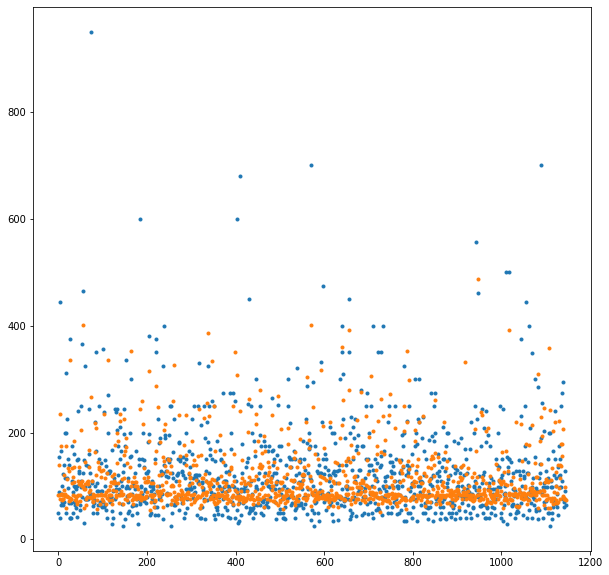

In [41]:
plt.figure(figsize=(10,10))
plt.plot(price, marker = '.', linestyle = '' )

* Here we see that the data fits very nicely. Actually if number of epochs are increased in the neural network, better is the accuracy

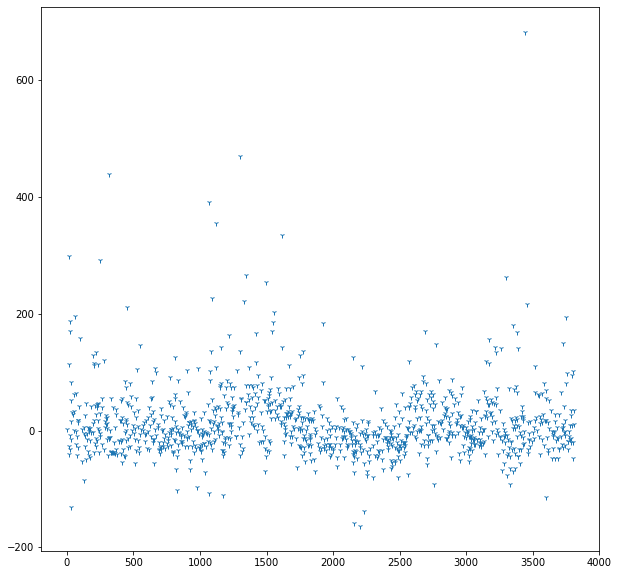

In [42]:
plt.figure(figsize=(10,10))
plt.plot(y_test - preds_round, marker='1', linestyle='')

# Evaluation

1. We see that airbnbs in Seattle with strict cancellation policy cost more
2. Since these top 10 listings give us most revenue in Seattle we should offer them some incentives
3. These top 10 reviewers should be rewarded to movivate users to write reviews
4. We see that the data fits very nicely to predict prices. Actually if number of epochs are increased in the neural network, better is the accuracy